Notebook for testing nn performance

In [17]:
# import dependencies
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from data_preprocessing import extract_csv_info, format_data, shuffle_and_split, split_input_output
from neural import train_and_generate_feedforward_network, train_and_generate_recurrent_network, train_and_generate_preisach_network, train_and_generate_recurrent_preisach_network

In [7]:
# Function to compute MSE of predicted values
def compute_mse(actual_y, predicted_y):
    actual_y = np.asarray(actual_y)
    predicted_y = np.asarray(predicted_y)
    diff = np.subtract(actual_y, predicted_y)
    squared = np.square(diff)
    mse = np.mean(squared)
    return mse


# test compute mse
# y = [11, 20, 19, 17, 10]
# y_pred = [12, 18, 19.5, 18, 9]
# print(compute_mse(y, y_pred))

In [18]:
# Function for plotting predicted values from NN
# TODO: add figsize and xlim as input to function to allow customization
def plot_predicted(next_h, next_b, model_name):
    plt.figure(figsize=(20, 12))
    plt.xlim(-750, 750)
    plt.plot(next_h, next_b, marker="o", color='black')
    plt.title(model_name + " Output Plot")
    plt.xlabel("Magnetic Field H (T)")
    plt.ylabel("Magnetic Flux B (A/m)")
    plt.show()

## Data Loading and Preprocessing

In [22]:
# Load data for training
raw_train_data = extract_csv_info("./data_simulated/M19_29Gauge - Sheet1.csv")
# format into (current H, current B, next H, next B)
formatted_data = format_data(raw_train_data)
#train, test = shuffle_and_split(formatted_data)
train_x, train_y = split_input_output(formatted_data)
#test_x, test_y = split_input_output(test)


In [23]:
# Load data for testing
raw_test_data = extract_csv_info("./data_simulated/M19_TESTINGDATA - M19_TESTINGDATA.csv")
formatted_test_data = format_data(raw_test_data)
test_x, test_y = split_input_output(formatted_test_data)

# Separate next_h values into separate list for plotting output
test_next_h = list()
for i in range(len(test_x)):
    test_next_h.append(test_x[i][2])


## Feedforward Network

In [24]:
# Generate and train feedforward network
feedforward_model = train_and_generate_feedforward_network(train_x, train_y, "feedforward.model", n_epochs=20)

Epoch 1/20
63/63 [==============================] - 2s 3ms/step - loss: 0.0686 - mean_squared_error: 0.0686
Epoch 2/20
63/63 [==============================] - 0s 2ms/step - loss: 0.0230 - mean_squared_error: 0.0230
Epoch 3/20
63/63 [==============================] - 0s 2ms/step - loss: 0.0177 - mean_squared_error: 0.0177

In [13]:
# Load feedforward model
feedforward_model = tf.keras.models.load_model("./models/feedforward.model")

In [25]:
# Evaluate feedforward network
feedforward_prediction = feedforward_model.predict(test_x)
mse = compute_mse(test_y, feedforward_prediction)
print("MSE: " + str(mse))

# tensorflow evaluation
feedforward_model.evaluate(test_x, test_y)

37/37 [==============================] - 0s 1ms/step
MSE: 0.8433608067449537
37/37 [==============================] - 1s 2ms/step - loss: 0.0191 - mean_squared_error: 0.0191     


[0.019060790538787842, 0.019060790538787842]

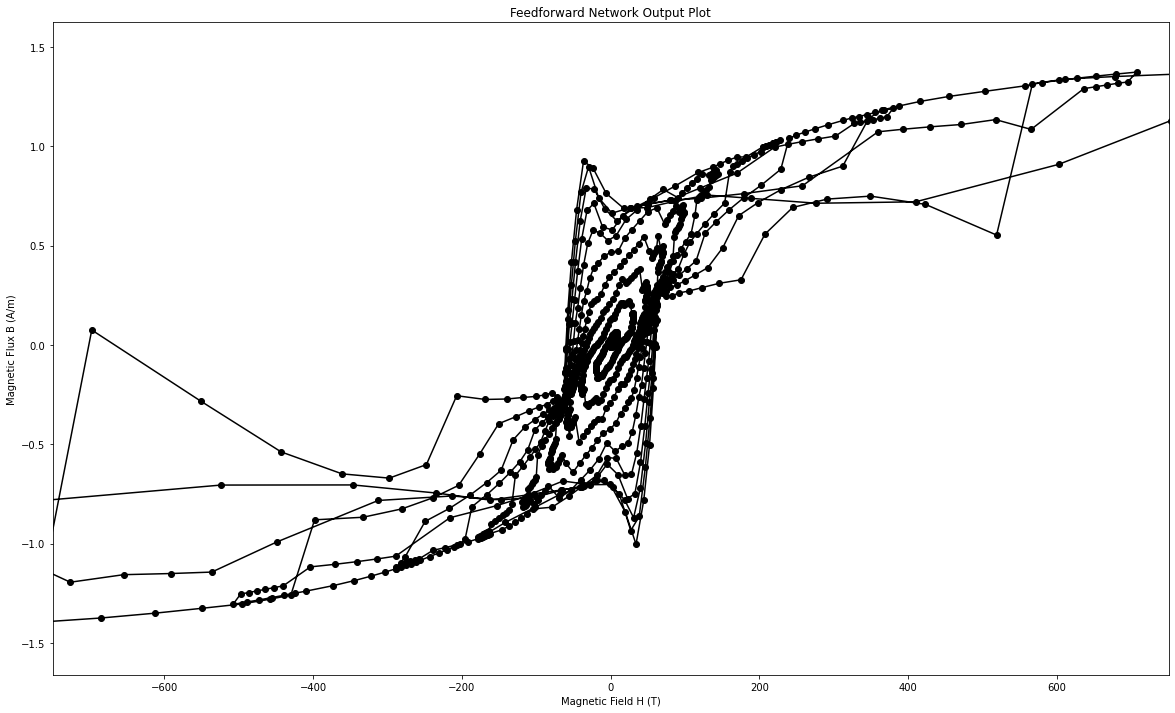

In [26]:
# Plot feedforward output
plot_predicted(test_next_h, feedforward_prediction, "Feedforward Network")


## Preisach Network

In [ ]:
# Generate and train preisach network
pnn_model = train_and_generate_preisach_network(train_x, train_y, "preisach.model", n_epochs=20)

In [ ]:
# Load preisach model
pnn_model = tf.keras.models.load_model("./models/preisach.model")

In [ ]:
#Evaluate preisach model
pnn_prediction = pnn_model.predict(test_x)
mse = compute_mse(test_y, pnn_prediction)
print("MSE: " + str(mse))

# tensorflow evaluation
pnn_model.evaluate(test_x, test_y)



## Recurrent Network
no stop activation layer

In [ ]:
# Generate and train recurrent network (no stop operator)
rnn_model = train_and_generate_recurrent_network(train_x, train_y, "recurrent.model", n_epochs=20)

In [ ]:
# Load recurrent network
rnn_model = tf.keras.models.load_model("./models/recurrent.model")

In [ ]:
# Evaluate recurrent model
rnn_prediction = rnn_model.predict(test_x)
mse = compute_mse(test_y, rnn_prediction)
print("MSE: " + str(mse))

# tensorflow evaluation
rnn_model.evaluate(test_x, test_y)



## Recurrent Preisach Network
includes stop activation layer

In [ ]:
# Generate and train recurrent preisach network
# TODO
